In [2]:
# Import library
# Library for preprocessing data
import pandas as pd
import numpy as np

# Library for visualization
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Library for KMeans
from sklearn.cluster import KMeans


In [3]:
# Read data from excel file
# Need to install package 'xlrd' to read .xls file.
data = pd.read_excel('./kmeans.xls')  
data

,Point,x,y
0,1,1.0,1.0
1,2,1.0,2.0
2,3,2.0,1.0
3,4,2.0,1.5
4,5,3.0,2.0
5,6,4.0,1.5
6,7,4.0,2.0
7,8,5.0,1.5
8,9,4.5,2.0
9,10,4.0,4.0


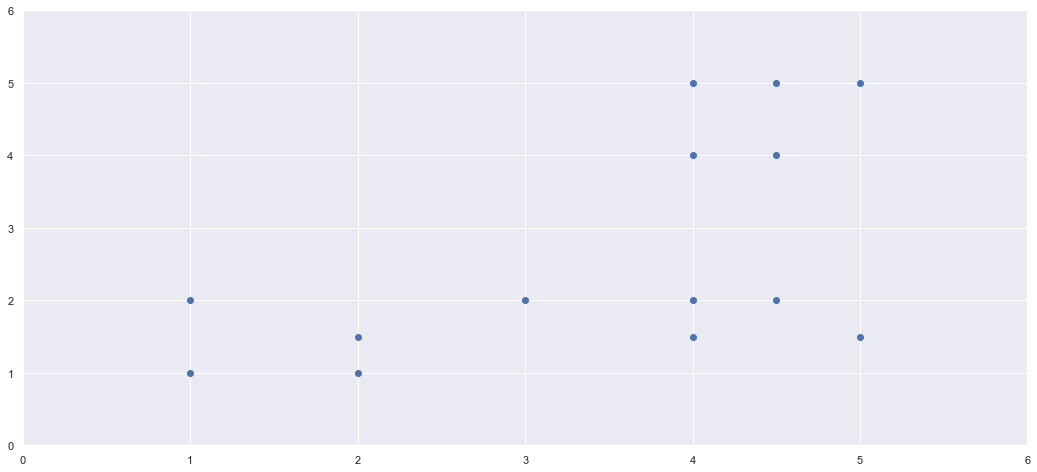

In [4]:
# Plot data
plt.figure(figsize=(18,8))
plt.scatter(data['x'],data['y'])
plt.xlim(0,6)
plt.ylim(0,6)
plt.show()

In [5]:
formatedData = data.iloc[:,1:3]
formatedData

,x,y
0,1.0,1.0
1,1.0,2.0
2,2.0,1.0
3,2.0,1.5
4,3.0,2.0
5,4.0,1.5
6,4.0,2.0
7,5.0,1.5
8,4.5,2.0
9,4.0,4.0


In [6]:
# Initialize KMeans cluster and fit model
kmeans= KMeans(3)
kmeans.fit(formatedData)

centroids = kmeans.cluster_centers_
labels= kmeans.labels_

centroids

array([[4.4  , 4.6  ],
       [4.1  , 1.8  ],
       [1.5  , 1.375]])

In [7]:
# Get unique value of labels
np.unique(labels)

array([0, 1, 2], dtype=int32)

In [8]:
# Assign label to data
formatedData['label'] = pd.Series(labels)
formatedData

,x,y,label
0,1.0,1.0,2
1,1.0,2.0,2
2,2.0,1.0,2
3,2.0,1.5,2
4,3.0,2.0,1
5,4.0,1.5,1
6,4.0,2.0,1
7,5.0,1.5,1
8,4.5,2.0,1
9,4.0,4.0,0


<function matplotlib.pyplot.show(close=None, block=None)>

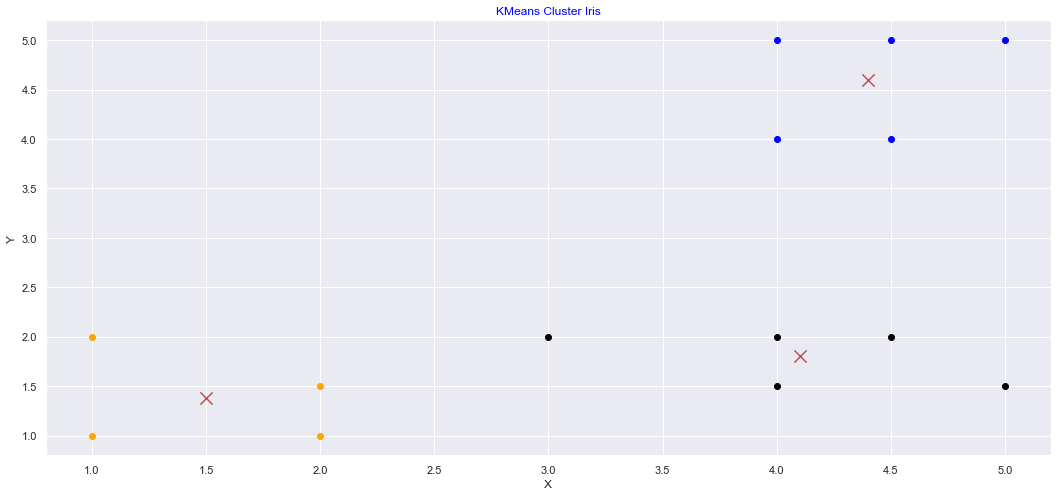

In [9]:
# Plot data
plt.figure(figsize=(18,8))
plt.scatter(centroids[:,0], centroids[:,1], marker ="x", s=150, color='r')
plt.scatter(formatedData[formatedData['label']==0]['x'], formatedData[formatedData['label']==0]['y'], c='blue')
plt.scatter(formatedData[formatedData['label']==1]['x'], formatedData[formatedData['label']==1]['y'], c='black')
plt.scatter(formatedData[formatedData['label']==2]['x'], formatedData[formatedData['label']==2]['y'], c='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("KMeans Cluster Iris", color="Blue")
plt.show